### imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

### Loading step

Synthetic Transactions: https://www.kaggle.com/ntnu-testimon/paysim1

In [3]:
# Load file
dataset = pd.read_csv('data/PS_20174392719_1491204439457_log.csv')

# Remove types that never are fraud
dataset = dataset.loc[dataset['type'] != 'PAYMENT']
dataset = dataset.loc[dataset['type'] != 'DEBIT']
dataset = dataset.loc[dataset['type'] != 'CASH_IN']

# Maps domain to numbers
dataset = dataset.replace("TRANSFER", 0)
dataset = dataset.replace("CASH_OUT", 1)

### Sample the data

In [43]:
dataset['hour'] = dataset['step'].map(lambda x: x % 24)
dataset['day'] = dataset['step'].map(lambda x: int(x / 24))
dataset['week'] = dataset['step'].map(lambda x: int(x / 168))

trainset = dataset.sample(frac=0.05)
testset = dataset.sample(frac=0.05)

### Train dataset information

In [44]:
train_qtd = trainset.shape[0]
train_fraud_qtd = len(list(filter(lambda x: x == 1, trainset['isFraud'])))
train_nonfraud_qtd = len(list(filter(lambda x: x == 0, trainset['isFraud'])))
train_proportion = train_fraud_qtd / train_qtd

print('train_total:', train_qtd)
print('train_fraud:', train_fraud_qtd)
print('train_nonfraud', train_nonfraud_qtd)
print('train_fraud proportion', train_proportion)
trainset.head()

train_total: 138520
train_fraud: 414
train_nonfraud 138106
train_fraud proportion 0.002988738088362691


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour,week
1395842,139,1,126440.45,C406711795,0.0,0.0,C149298679,11236226.75,11362667.20,0,0,5,19,0
998364,45,0,319406.36,C1130413848,247.0,0.0,C120213301,206955.98,526362.33,0,0,1,21,0
510536,20,1,43770.74,C44923926,0.0,0.0,C1811957129,120361.04,189762.69,0,0,0,20,0
1484806,141,1,206651.81,C1523778078,0.0,0.0,C1374357581,3437899.26,3644551.07,0,0,5,21,0
3828050,282,1,225913.77,C1768902230,20630.0,0.0,C1546670258,351983.51,577897.28,0,0,11,18,1


### Test dataset information

In [45]:
test_qtd = testset.shape[0]
test_fraud_qtd = len(list(filter(lambda x: x == 1, testset['isFraud'])))
test_nonfraud_qtd = len(list(filter(lambda x: x == 0, testset['isFraud'])))
test_proportion = test_fraud_qtd / test_qtd

print('test_total:', test_qtd)
print('test_fraud:', test_fraud_qtd)
print('test_nonfraud', test_nonfraud_qtd)
print('test_fraud proportion', test_proportion)
testset.head()

test_total: 138520
test_fraud: 403
test_nonfraud 138117
test_fraud proportion 0.002909327172971412


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,day,hour,week
4453678,323,1,141210.53,C93085301,495826.00,354615.47,C1979256681,0.00,141210.53,0,0,13,11,1
52509,9,1,290104.16,C2115624592,1034.00,0.00,C185282707,8875.00,1413403.07,0,0,0,9,0
1956896,178,0,1109724.36,C233997721,80208.43,0.00,C1930866362,2024157.30,3133881.66,0,0,7,10,1
5658268,396,1,195529.31,C697782623,0.00,0.00,C1007765603,629090.87,553921.49,0,0,16,12,2
5085324,355,1,62143.58,C1040487897,203689.00,141545.42,C319010261,399924.92,462068.50,0,0,14,19,2


### Divide Fraud x NonFraud

In [46]:
train_frauds = trainset.loc[trainset['isFraud'] == 1]
train_non_frauds = trainset.loc[trainset['isFraud'] == 0]

### Labs

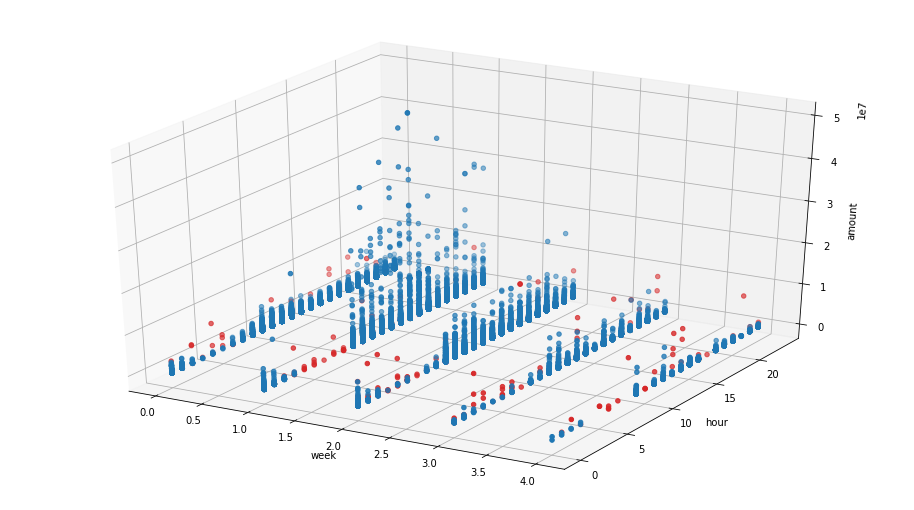

In [48]:
def plot(x_value, y_value, z_value):
    fig = plt.figure()
    fig.set_size_inches(16, 9)
    ax = fig.add_subplot(111, projection='3d')
    
    
    x_fraud = train_frauds[[x_value]]
    y_fraud = train_frauds[[y_value]]
    z_fraud = train_frauds[[z_value]]

    x_nonfraud = train_non_frauds[[x_value]]
    y_nonfraud = train_non_frauds[[y_value]]
    z_nonfraud = train_non_frauds[[z_value]]
    
    ax.scatter(x_fraud, y_fraud, z_fraud, c='C3')
    ax.scatter(x_nonfraud, y_nonfraud, z_nonfraud, c='C0')
    
    ax.set_xlabel(x_value)
    ax.set_ylabel(y_value)
    ax.set_zlabel(z_value)
    
plot('week', 'hour', 'amount')